## Manual review

In [17]:
import pandas as pd

tifa_scores_mplug = pd.read_csv("tifa_scores_mplug.csv")
tifa_scores_mplug.groupby(["model"])["tifa_score"].mean()

model
DALLE-3       0.748720
Midjourney    0.782493
SD1_4         0.582517
SD2_1_base    0.683051
SD_3          0.780986
Wuerstchen    0.646882
artbreeder    0.702576
references    0.842083
Name: tifa_score, dtype: float64

In [18]:
max_tifas = tifa_scores_mplug.loc[tifa_scores_mplug.groupby(["name", "model"])["tifa_score"].transform(max) == tifa_scores_mplug["tifa_score"]]
max_tifas = max_tifas[max_tifas.model != "references"]
max_tifas

C:\Users\Miriam\AppData\Local\Temp\ipykernel_3852\1011195310.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_tifas = tifa_scores_mplug.loc[tifa_scores_mplug.groupby(["name", "model"])["tifa_score"].transform(max) == tifa_scores_mplug["tifa_score"]]


,name,model,id,description,tifa_score,question_details
0,Endometriosis,DALLE-3,0,This is a chronic condition in women where the...,0.000,{'all_black': True}
1,Endometriosis,DALLE-3,1,This is a chronic condition in women where the...,0.000,{'all_black': True}
2,Endometriosis,DALLE-3,2,This is a chronic condition in women where the...,0.000,{'all_black': True}
3,Endometriosis,DALLE-3,3,This is a chronic condition in women where the...,0.000,{'all_black': True}
4,Exchange on the Internet,DALLE-3,0,"In the middle, there is a globe depicted. Arou...",1.000,{'are there individuals depicted?': {'caption'...
...,...,...,...,...,...,...
2286,Poor Memory Performance,SD_3,1,A woman holds her forehead thoughtfully. Quest...,0.875,{'who is holding her forehead thoughtfully?': ...
2289,Being Deaf,SD_3,0,Depicted are two persons facing each other. On...,0.800,{'is one person communicating in sign language...
2291,Being Deaf,SD_3,2,Depicted are two persons facing each other. On...,0.800,{'is one person communicating in sign language...
2292,Being Deaf,SD_3,3,Depicted are two persons facing each other. On...,0.800,{'is one person communicating in sign language...


In [23]:
max_tifas[(max_tifas.model == "DALLE-3") & (max_tifas.name == "Application") & (max_tifas.id == "0")]["question_details"].item()

'{\'are there persons?\': {\'caption\': "The arms of two persons are recognizable. One person is pointing to the word \'Application\' written on top of a document. The other person is holding a pen ready to write.", \'element\': \'persons\', \'question\': \'are there persons?\', \'choices\': [\'yes\', \'no\'], \'answer\': \'yes\', \'element_type\': \'animal/human\', \'free_form_vqa\': \'yes\', \'multiple_choice_vqa\': \'yes\', \'scores\': 1}, \'who are in the picture?\': {\'caption\': "The arms of two persons are recognizable. One person is pointing to the word \'Application\' written on top of a document. The other person is holding a pen ready to write.", \'element\': \'persons\', \'question\': \'who are in the picture?\', \'choices\': [\'persons\', \'animals\', \'robots\', \'aliens\'], \'answer\': \'persons\', \'element_type\': \'animal/human\', \'free_form_vqa\': \'people\', \'multiple_choice_vqa\': \'persons\', \'scores\': 1}, \'is there a word written on top of a document?\': {\'

In [39]:
import numpy as np

human_corrected = pd.DataFrame(columns=human.columns)

for (g_model, g_name), g_df in max_tifas.groupby(["model", "name"]):
    human_annotated = human[(human.model == g_model) & (human.name == g_name)]
    human_id = human_annotated["id"].item()
    #print(g_model, g_name, human_id)
    if str(human_id) not in g_df["id"].values:
        human_annotated = g_df.sample(1)
        human_annotated["follow_prompt"] = np.nan
        human_annotated["correctness"] = np.nan
        human_annotated["biased"] = np.nan
        human_annotated["suitable"] = np.nan
    else:
        human_annotated["tifa_score"] = g_df[g_df.id == str(human_id)]["tifa_score"].item()
        human_annotated["question_details"] = g_df[g_df.id == str(human_id)]["question_details"].item()

    human_corrected = pd.concat([human_corrected, human_annotated])
human_corrected

C:\Users\Miriam\AppData\Local\Temp\ipykernel_3852\2480876991.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_annotated["tifa_score"] = g_df[g_df.id == str(human_id)]["tifa_score"].item()
C:\Users\Miriam\AppData\Local\Temp\ipykernel_3852\2480876991.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_annotated["question_details"] = g_df[g_df.id == str(human_id)]["question_details"].item()
C:\Users\Miriam\AppData\Local\Temp\ipykernel_3852\2480876991.py:19: FutureWarning: The behavior of DataF

,name,model,id,description,tifa_score,question_details,follow_prompt,correctness,biased,suitable
0,Adult with Heart Defect,DALLE-3,0,A man looks down at his chest. His heart is de...,1.0,{'who is looking down at his chest?': {'captio...,3.0,3.0,0.0,3.0
1,Application,DALLE-3,0,The arms of two persons are recognizable. One ...,1.0,"{'are there persons?': {'caption': ""The arms o...",3.0,3.0,0.0,2.0
2,Arrangement of Nursing Services,DALLE-3,2,Two women are talking in front of a car labele...,1.0,{'who are talking in front of a car?': {'capti...,2.0,2.0,0.0,2.0
3,Assistance for People with Visual Impairments,DALLE-3,0,A young man accompanies a lady with visual imp...,1.0,{'is this a lady?': {'caption': 'A young man a...,3.0,1.0,3.0,1.0
4,Bacteria,DALLE-3,3,"Illustration of two different elongated, green...",1.0,{'what type of organism is this?': {'caption':...,3.0,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
555,Transfer Aids,artbreeder,0,"Two transfer aids are shown in the picture, on...",0.9,{'what type of object is this?': {'caption': '...,2.0,0.0,0.0,0.0
556,Trouble Smelling,artbreeder,0,A lady smells a cut lemon and doesn't recogniz...,1.0,"{'is this a lemon?': {'caption': ""A lady smell...",2.0,1.0,0.0,0.0
557,Twin Room,artbreeder,1,"Depicted is a bedroom with two separate beds, ...",0.6,{'what type of place is this?': {'caption': 'D...,1.0,0.0,0.0,0.0
558,Vitamins,artbreeder,1,Depicted is a bowl containing various fruits.,1.0,{'are there fruits in the bowl?': {'caption': ...,3.0,2.0,0.0,2.0


In [40]:
human_corrected[(human_corrected.model == "DALLE-3") & (human_corrected.name == "Application") & (human_corrected.id == 0)]["question_details"].item()

'{\'are there persons?\': {\'caption\': "The arms of two persons are recognizable. One person is pointing to the word \'Application\' written on top of a document. The other person is holding a pen ready to write.", \'element\': \'persons\', \'question\': \'are there persons?\', \'choices\': [\'yes\', \'no\'], \'answer\': \'yes\', \'element_type\': \'animal/human\', \'free_form_vqa\': \'yes\', \'multiple_choice_vqa\': \'yes\', \'scores\': 1}, \'who are in the picture?\': {\'caption\': "The arms of two persons are recognizable. One person is pointing to the word \'Application\' written on top of a document. The other person is holding a pen ready to write.", \'element\': \'persons\', \'question\': \'who are in the picture?\', \'choices\': [\'persons\', \'animals\', \'robots\', \'aliens\'], \'answer\': \'persons\', \'element_type\': \'animal/human\', \'free_form_vqa\': \'people\', \'multiple_choice_vqa\': \'persons\', \'scores\': 1}, \'is there a word written on top of a document?\': {\'

In [41]:
human_corrected[human_corrected.isna().any(axis=1)]

,name,model,id,description,tifa_score,question_details,follow_prompt,correctness,biased,suitable


In [42]:
human_corrected.to_csv("human_eval.csv", index=False)

In [3]:
import numpy as np

human_eval = max_tifas.groupby(["name", "model"]).apply(lambda x: x.sample(1)).reset_index(drop=True).copy()
human_eval["follow_prompt"] = np.nan # yes/no, no if content added/missing (9 instead of 7 persons neglected) or indeterminable
human_eval["correctness"] = np.nan # yes/no, no if mistakes or unrealistic
human_eval["biased"] = np.nan # yes/no, yes if added wheelchair, unhappy/old people
human_eval["suitable"] = np.nan # yes/no, no if too colorful/too many details or text or not depicting what should be depicted (no missing foot for foot amputation)
human_eval

C:\Users\Miriam\AppData\Local\Temp\ipykernel_2056\4001571211.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  human_eval = max_tifas.groupby(["name", "model"]).apply(lambda x: x.sample(1)).reset_index(drop=True).copy()


,name,model,id,description,tifa_score,question_details,follow_prompt,correctness,biased,suitable
0,Adult with Heart Defect,DALLE-3,0,A man looks down at his chest. His heart is de...,1.0,{'who is looking down at his chest?': {'captio...,NaN,NaN,NaN,NaN
1,Adult with Heart Defect,Midjourney,1,A man looks down at his chest. His heart is de...,1.0,{'who is looking down at his chest?': {'captio...,NaN,NaN,NaN,NaN
2,Adult with Heart Defect,SD1_4,0,A man looks down at his chest. His heart is de...,1.0,{'who is looking down at his chest?': {'captio...,NaN,NaN,NaN,NaN
3,Adult with Heart Defect,SD2_1_base,1,A man looks down at his chest. His heart is de...,1.0,{'who is looking down at his chest?': {'captio...,NaN,NaN,NaN,NaN
4,Adult with Heart Defect,SD_3,2,A man looks down at his chest. His heart is de...,1.0,{'who is looking down at his chest?': {'captio...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
555,Yoga,SD1_4,2,"Three people are shown on mats, and one person...",0.6,{'who is on mats?': {'caption': 'Three people ...,NaN,NaN,NaN,NaN
556,Yoga,SD2_1_base,2,"Three people are shown on mats, and one person...",0.6,{'who is on mats?': {'caption': 'Three people ...,NaN,NaN,NaN,NaN
557,Yoga,SD_3,0,"Three people are shown on mats, and one person...",0.8,{'who is on mats?': {'caption': 'Three people ...,NaN,NaN,NaN,NaN
558,Yoga,Wuerstchen,3,"Three people are shown on mats, and one person...",0.8,{'who is on mats?': {'caption': 'Three people ...,NaN,NaN,NaN,NaN


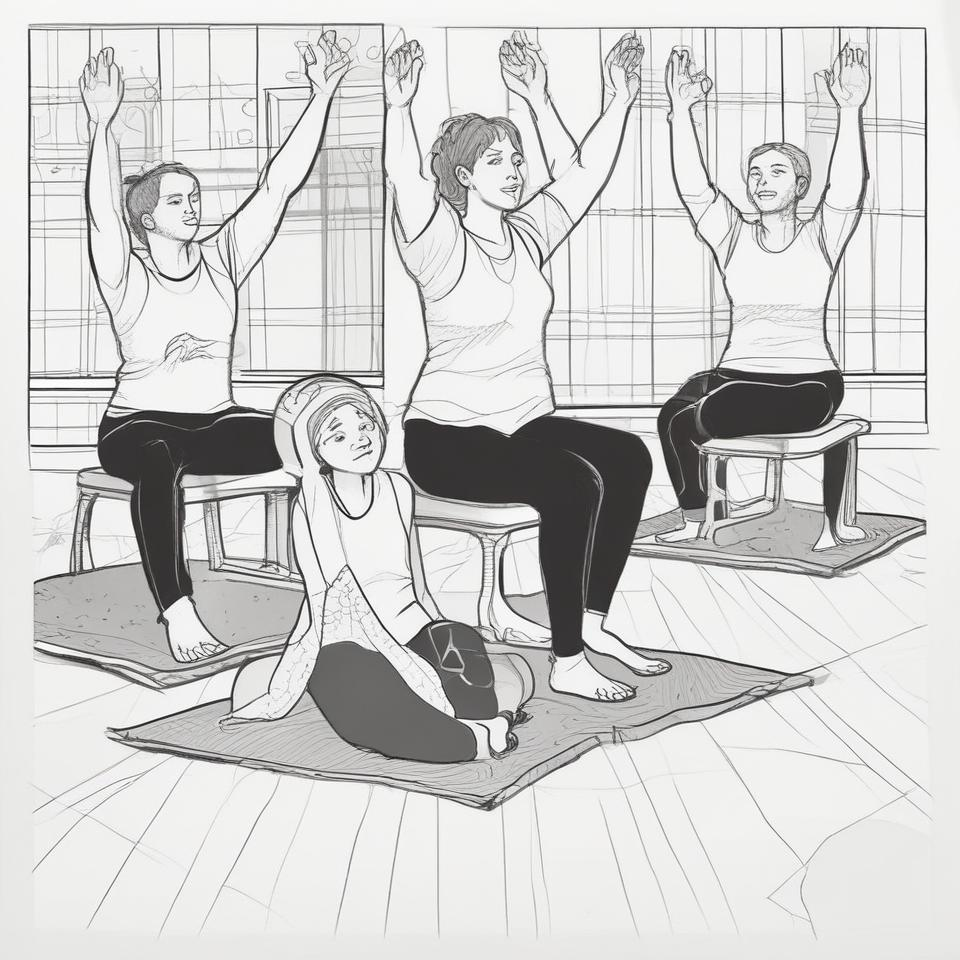

Yoga
Three people are shown on mats, and one person is in a wheelchair. Their hands are raised upward. They stretch the backsides by holding one hand with the other and pulling slightly.


Does the image follow the prompt? p
Is the image correct? n
Is the image biased? n
Is the image suitable for the target group? n


In [12]:
from IPython.display import display, clear_output
from PIL import Image

models = {
    "DALLE-3": ".jpg",
    "Midjourney": ".png",
    "artbreeder": ".jfif",
    "SD1_4": ".png",
    "SD2_1_base": ".png",
    "Wuerstchen": ".png",
    #"references/": ".jpg",
    "SD_3": ".png"
}

for i, row in human_eval.iterrows():
    if type(row["follow_prompt"]) == str:
        continue
    else:
        clear_output(wait=False)
        img_name = f"{row['name'].replace(' ', '_')}_{row['id']}"p

        
        model = row['model']
        img = Image.open(f"../images/{model}/{img_name}{models[model]}")
        display(img)
        print(row["name"])
        print(row["description"])
        human_eval.at[i, "follow_prompt"] = input("Does the image follow the prompt?")
        human_eval.at[i, "correctness"] = input("Is the image correct?")
        human_eval.at[i, "biased"] = input("Is the image biased?")
        human_eval.at[i, "suitable"] = input("Is the image suitable for the target group?")
        human_eval.to_csv("human_eval.csv", index=False)n

In [ ]:
"""
manual selection:
- colors
- correct human features
- not too much going on
- no text/ correct text
SD3 foot amputation
"""

In [53]:
ls_bilder = pd.read_csv("../sampled_data_fixed.csv")
ls_bilder

,category,english_name,english_description,image_url,prompt,german_name,german_description
0,Hilfsmittel,Long Cane,"An image of a long cane, unfolded and folded.",https://www.lag-sb-rlp.de/images/phocagallery/...,Cartoon picture of Long Cane - An image of a l...,Langstock,"Abgebildet ist ein Langstock, der ausgeklappt ..."
1,Hilfsmittel,Induction Loop,The picture shows three people at a table. A l...,https://www.lag-sb-rlp.de/images/phocagallery/...,Cartoon picture of Induction Loop - The pictur...,Induktionsschleife,Auf dem Bild sieht man drei Personen an einem ...
2,Hilfsmittel,Forearm Prosthesis,"An arm is depicted, with the forearm missing f...",https://www.lag-sb-rlp.de/images/phocagallery/...,Cartoon picture of Forearm Prosthesis - An arm...,Unterarmprothese,"Abgebildet ist ein Arm, dessen Unterarm, ab de..."
3,Hilfsmittel,Hearing Aid,A man and a woman are talking to each other. T...,https://www.lag-sb-rlp.de/images/phocagallery/...,Cartoon picture of Hearing Aid - A man and a w...,Hoergeraet,Ein Mann und eine Frau sprechen miteinander. D...
4,Hilfsmittel,Transfer Aids,"Two transfer aids are shown in the picture, on...",https://www.lag-sb-rlp.de/images/phocagallery/...,Cartoon picture of Transfer Aids - Two transfe...,Transferhilfen,Auf dem Bild sind zwei Transferhilfen eingezei...
...,...,...,...,...,...,...,...
75,Gefuehle,Security,Depicted are a woman and a man lovingly embrac...,https://www.lag-sb-rlp.de/images/phocagallery/...,Cartoon picture of Security - Depicted are a w...,Geborgenheit,"Abgebildet sind eine Frau und ein Mann, die ei..."
76,Gefuehle,Self-love,Depicted is a dark-haired young lady looking i...,https://www.lag-sb-rlp.de/images/phocagallery/...,Cartoon picture of Self-love - Depicted is a d...,Selbstliebe,"Abgebildet ist eine dunkelhaarige junge Dame, ..."
77,Gefuehle,Panic Attack,Depicted is a woman with her mouth open and ey...,https://www.lag-sb-rlp.de/images/phocagallery/...,Cartoon picture of Panic Attack - Depicted is ...,Panikattacke,"Abgebildet ist eine Frau, die den Mund offen u..."
78,Gefuehle,Despair,A woman covers her face with both hands. She c...,https://www.lag-sb-rlp.de/images/phocagallery/...,Cartoon picture of Despair - A woman covers he...,Verzweiflung,Eine Frau haelt sich beide Haende vor ihr Gesi...


In [54]:
for model in models.keys():
    print("**", model)
    for name in ls_bilder["english_name"]:
        num_samples = len(tifa_scores_mplug[(tifa_scores_mplug["name"] == name) & (tifa_scores_mplug["model"] == model)])
        if num_samples < 4:
            print("\t", name, num_samples)

** DALLE-3
	 Endometriosis 0
	 MS Episode 1
	 Early Detection 2
	 Chest X-ray 3
	 Colonoscopy 0
	 Balance Disorder 1
	 Foot Amputation 0
	 Seeing Blurred 3
	 Breathing Techniques 1
	 Refusal of Physical Contact 2
	 Child Does Not Play with Others 2
	 Doctor's Lecture 3
	 Self-Help Group for Relatives 0
	 Empathy 2
	 Digestive Tract 0
	 Self-love 1
** Midjourney
** artbreeder
** SD1_4
	 Long Cane 2
	 Endometriosis 0
	 MS Episode 0
	 Manic Phase (Bipolar Disorder) 3
	 Colonoscopy 3
	 Assistance for People with Visual Impairments 3
	 Child with Minor Heart Defect 3
	 Trouble Smelling 3
	 Foot Amputation 3
	 Breathing Techniques 3
	 Causes of Origin are Unknown 3
	 Self-Help Association 3
	 Self-Help Group for Relatives 3
	 Empathy 3
	 Poor Memory Performance 3
	 Being Deaf 3
	 Large and Small Intestines and Stomach 2
	 Digestive Tract 2
	 Heart Septum 3
	 Sternum 3
	 Bacteria 3
	 Security 3
** SD2_1_base
** Wuerstchen
** SD_3


## Compare models

In [1]:
import pandas as pd

human = pd.read_csv("human_eval.csv")
human

,name,model,id,description,tifa_score,question_details,follow_prompt,correctness,biased,suitable
0,Adult with Heart Defect,DALLE-3,0,A man looks down at his chest. His heart is de...,1.0,{'who is looking down at his chest?': {'captio...,3.0,3.0,0.0,3.0
1,Application,DALLE-3,0,The arms of two persons are recognizable. One ...,1.0,"{'are there persons?': {'caption': ""The arms o...",3.0,3.0,0.0,2.0
2,Arrangement of Nursing Services,DALLE-3,2,Two women are talking in front of a car labele...,1.0,{'who are talking in front of a car?': {'capti...,2.0,2.0,0.0,2.0
3,Assistance for People with Visual Impairments,DALLE-3,0,A young man accompanies a lady with visual imp...,1.0,{'is this a lady?': {'caption': 'A young man a...,3.0,1.0,3.0,1.0
4,Bacteria,DALLE-3,3,"Illustration of two different elongated, green...",1.0,{'what type of organism is this?': {'caption':...,3.0,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
555,Transfer Aids,artbreeder,0,"Two transfer aids are shown in the picture, on...",0.9,{'what type of object is this?': {'caption': '...,2.0,0.0,0.0,0.0
556,Trouble Smelling,artbreeder,0,A lady smells a cut lemon and doesn't recogniz...,1.0,"{'is this a lemon?': {'caption': ""A lady smell...",2.0,1.0,0.0,0.0
557,Twin Room,artbreeder,1,"Depicted is a bedroom with two separate beds, ...",0.6,{'what type of place is this?': {'caption': 'D...,1.0,0.0,0.0,0.0
558,Vitamins,artbreeder,1,Depicted is a bowl containing various fruits.,1.0,{'are there fruits in the bowl?': {'caption': ...,3.0,2.0,0.0,2.0


In [2]:
score_mapping = {
    "n": 0.0,
    "p": 1.0,
    "m": 2.0,
    "y": 3.0,
}

In [4]:
#human["follow_prompt"] = human.follow_prompt.apply(lambda x: score_mapping[x])
print(human.groupby(["model"])["follow_prompt"].mean(), human.groupby(["model"])["follow_prompt"].std())

model
DALLE-3       2.2250
Midjourney    2.0625
SD1_4         0.4750
SD2_1_base    0.5000
SD_3          1.4750
Wuerstchen    0.7625
artbreeder    1.2500
Name: follow_prompt, dtype: float64 model
DALLE-3       0.913679
Midjourney    0.876468
SD1_4         0.795159
SD2_1_base    0.746299
SD_3          0.980506
Wuerstchen    0.815107
artbreeder    0.878722
Name: follow_prompt, dtype: float64


In [5]:
#human["correctness"] = human.correctness.apply(lambda x: score_mapping[x])
print(human.groupby(["model"])["correctness"].mean(), human.groupby(["model"])["correctness"].std())

model
DALLE-3       2.1875
Midjourney    1.9875
SD1_4         0.1875
SD2_1_base    0.1625
SD_3          0.9000
Wuerstchen    0.4625
artbreeder    1.0500
Name: correctness, dtype: float64 model
DALLE-3       0.955911
Midjourney    0.878632
SD1_4         0.452664
SD2_1_base    0.514197
SD_3          0.935922
Wuerstchen    0.841093
artbreeder    0.992376
Name: correctness, dtype: float64


In [6]:
#human["biased"] = human.biased.apply(lambda x: score_mapping[x[0]])
print(human.groupby(["model"])["biased"].mean(), human.groupby(["model"])["biased"].std())

model
DALLE-3       0.2125
Midjourney    0.0875
SD1_4         0.0000
SD2_1_base    0.0000
SD_3          0.1375
Wuerstchen    0.0000
artbreeder    0.0125
Name: biased, dtype: float64 model
DALLE-3       0.741086
Midjourney    0.482445
SD1_4         0.000000
SD2_1_base    0.000000
SD_3          0.610950
Wuerstchen    0.000000
artbreeder    0.111803
Name: biased, dtype: float64


In [7]:
#human["suitable"] = human.suitable.apply(lambda x: score_mapping[x])
print(human.groupby(["model"])["suitable"].mean(), human.groupby(["model"])["suitable"].std())

model
DALLE-3       1.8500
Midjourney    1.2000
SD1_4         0.0625
SD2_1_base    0.0625
SD_3          0.5125
Wuerstchen    0.2000
artbreeder    0.3875
Name: suitable, dtype: float64 model
DALLE-3       1.126212
Midjourney    1.106940
SD1_4         0.290950
SD2_1_base    0.290950
SD_3          0.826672
Wuerstchen    0.513119
artbreeder    0.684249
Name: suitable, dtype: float64


In [44]:
import ast
from statistics import mean

tifa_humans = []
tifa_elses = []
tifa_alls = []
tifa_official = []
for _, row in human.iterrows():
    tifa_human = 0.0
    tifa_else = 0.0
    tifa_all = []
    if row["question_details"] ==  "{'all_black': True}":
        num_questions = 1
        tifa_alls.append(0.0)
    else:
        question_details = ast.literal_eval(row["question_details"])
        for _, question_detail in question_details.items():
            tifa_all.append(question_detail["scores"])
            if question_detail["element_type"] == "animal/human":
                tifa_human += question_detail["scores"]
            else: 
                tifa_else += question_detail["scores"]
        num_questions = len(question_details)
        tifa_alls.append(mean(tifa_all))
    tifa_humans.append(tifa_human / num_questions)
    tifa_elses.append(tifa_else / num_questions)
    tifa_official.append(row["tifa_score"])

In [45]:
tifa_alls

[1,
 1,
 1,
 1,
 1,
 0.6666666666666666,
 1,
 1,
 0.75,
 0.8,
 1,
 0.875,
 1,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.875,
 1,
 0.8333333333333334,
 0.875,
 0.0,
 1,
 0.75,
 0.875,
 1,
 0.0,
 1,
 1,
 0.875,
 1,
 0.0,
 1,
 0.6666666666666666,
 0.8888888888888888,
 0.0,
 1,
 1,
 0.5714285714285714,
 1,
 1,
 0.7777777777777778,
 0.7777777777777778,
 0.8,
 1,
 0.875,
 0.8,
 1,
 0.5,
 1,
 0.8888888888888888,
 0.7777777777777778,
 0.8333333333333334,
 1,
 1,
 1,
 0.8333333333333334,
 0.7142857142857143,
 0.875,
 1,
 0.5714285714285714,
 0.75,
 0.625,
 0.6,
 0.7777777777777778,
 0.6666666666666666,
 0.7142857142857143,
 1,
 0.8571428571428571,
 0.0,
 1,
 0.8571428571428571,
 0.7,
 0.8,
 1,
 0.9,
 1,
 1,
 1,
 0.8,
 1,
 1,
 1,
 0.8571428571428571,
 1,
 1,
 1,
 1,
 1,
 0.8,
 0.8,
 1,
 1,
 0.8333333333333334,
 0.8333333333333334,
 1,
 0.6666666666666666,
 0.875,
 0.8333333333333334,
 1,
 0.875,
 0.8571428571428571,
 1,
 1,
 0.875,
 1,
 1,
 1,
 1,
 1,

In [46]:
tifa_official

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 1.0,
 1.0,
 0.75,
 0.8,
 1.0,
 0.875,
 1.0,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.875,
 1.0,
 0.8333333333333334,
 0.875,
 0.0,
 1.0,
 0.75,
 0.875,
 1.0,
 0.0,
 1.0,
 1.0,
 0.875,
 1.0,
 0.0,
 1.0,
 0.6666666666666666,
 0.8888888888888888,
 0.0,
 1.0,
 1.0,
 0.5714285714285714,
 1.0,
 1.0,
 0.7777777777777778,
 0.7777777777777778,
 0.8,
 1.0,
 0.875,
 0.8,
 1.0,
 0.5,
 1.0,
 0.8888888888888888,
 0.7777777777777778,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 0.8333333333333334,
 0.7142857142857143,
 0.875,
 1.0,
 0.5714285714285714,
 0.75,
 0.625,
 0.6,
 0.7777777777777778,
 0.6666666666666666,
 0.7142857142857143,
 1.0,
 0.8571428571428571,
 0.0,
 1.0,
 0.8571428571428571,
 0.7,
 0.8,
 1.0,
 0.9,
 1.0,
 1.0,
 1.0,
 0.8,
 1.0,
 1.0,
 1.0,
 0.8571428571428571,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8,
 0.8,
 1.0,
 1.0,
 0.8333333333333334,
 0.8333333333333334,
 1.0,
 0.6666666666666666,
 0.875,
 

In [11]:
human["tifa_score"]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
555    0.6
556    0.6
557    0.8
558    0.8
559    0.6
Name: tifa_score, Length: 560, dtype: float64

In [3]:
scales = ["follow_prompt", "correctness", "biased", "suitable"]

for scale in scales:
    if scale == "biased":
        human[scale] = human.biased.apply(lambda x: score_mapping[x[0]])
    else:
        human[scale] = human[scale].apply(lambda x: score_mapping[x])
human

,name,model,id,description,tifa_score,question_details,follow_prompt,correctness,biased,suitable
0,Adult with Heart Defect,DALLE-3,0,A man looks down at his chest. His heart is de...,1.0,{'who is looking down at his chest?': {'captio...,3.0,3.0,0.0,3.0
1,Adult with Heart Defect,Midjourney,1,A man looks down at his chest. His heart is de...,1.0,{'who is looking down at his chest?': {'captio...,3.0,2.0,0.0,2.0
2,Adult with Heart Defect,SD1_4,0,A man looks down at his chest. His heart is de...,1.0,{'who is looking down at his chest?': {'captio...,0.0,0.0,0.0,0.0
3,Adult with Heart Defect,SD2_1_base,1,A man looks down at his chest. His heart is de...,1.0,{'who is looking down at his chest?': {'captio...,0.0,0.0,0.0,0.0
4,Adult with Heart Defect,SD_3,2,A man looks down at his chest. His heart is de...,1.0,{'who is looking down at his chest?': {'captio...,3.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
555,Yoga,SD1_4,2,"Three people are shown on mats, and one person...",0.6,{'who is on mats?': {'caption': 'Three people ...,0.0,0.0,0.0,0.0
556,Yoga,SD2_1_base,2,"Three people are shown on mats, and one person...",0.6,{'who is on mats?': {'caption': 'Three people ...,0.0,0.0,0.0,0.0
557,Yoga,SD_3,0,"Three people are shown on mats, and one person...",0.8,{'who is on mats?': {'caption': 'Three people ...,3.0,2.0,0.0,3.0
558,Yoga,Wuerstchen,3,"Three people are shown on mats, and one person...",0.8,{'who is on mats?': {'caption': 'Three people ...,1.0,1.0,0.0,0.0


In [19]:
print("\\textbf{Model} & " + " & ".join(["\\textbf{" + scale + "}" for scale in scales]) + "\\\\ \\midrule")
for model in human["model"].unique():
    model_string = "\\textbf{" + model.replace("_", "\\_") + "} & "
    for scale in scales:
        model_string += "{:0.2f} & ".format(human[human.model == model][scale].mean())
    model_string = model_string[:-2] + "\\\\"
    print(model_string)

\textbf{Model} & \textbf{follow_prompt} & \textbf{correctness} & \textbf{biased} & \textbf{suitable}\\ \midrule
\textbf{DALLE-3} & 2.23 & 2.19 & 0.21 & 1.85 \\
\textbf{Midjourney} & 2.06 & 1.99 & 0.09 & 1.20 \\
\textbf{SD1\_4} & 0.47 & 0.19 & 0.00 & 0.06 \\
\textbf{SD2\_1\_base} & 0.50 & 0.16 & 0.00 & 0.06 \\
\textbf{SD\_3} & 1.48 & 0.90 & 0.14 & 0.51 \\
\textbf{Wuerstchen} & 0.76 & 0.46 & 0.00 & 0.20 \\
\textbf{artbreeder} & 1.25 & 1.05 & 0.01 & 0.39 \\


In [5]:
human[(human.suitable == "y") | (human.suitable == "m")].groupby(["name"]).filter(lambda x: len(x) > 2)

,name,model,id,description,tifa_score,question_details,follow_prompt,correctness,biased,suitable
0,Adult with Heart Defect,DALLE-3,0,A man looks down at his chest. His heart is de...,1.000000,{'who is looking down at his chest?': {'captio...,y,y,n,y
1,Adult with Heart Defect,Midjourney,1,A man looks down at his chest. His heart is de...,1.000000,{'who is looking down at his chest?': {'captio...,y,m,n,m
4,Adult with Heart Defect,SD_3,2,A man looks down at his chest. His heart is de...,1.000000,{'who is looking down at his chest?': {'captio...,y,m,n,m
42,Bathroom,DALLE-3,3,"Depicted is a bathroom with toilet, wall shelv...",1.000000,{'what type of place is this?': {'caption': 'D...,y,y,n,y
43,Bathroom,Midjourney,0,"Depicted is a bathroom with toilet, wall shelv...",1.000000,{'what type of place is this?': {'caption': 'D...,y,m,n,y
46,Bathroom,SD_3,2,"Depicted is a bathroom with toilet, wall shelv...",1.000000,{'what type of place is this?': {'caption': 'D...,y,m,n,m
49,Bedroom,DALLE-3,2,"Depicted is a bedroom with a bed, nightstand, ...",1.000000,{'what type of place is this?': {'caption': 'D...,y,y,n,y
50,Bedroom,Midjourney,2,"Depicted is a bedroom with a bed, nightstand, ...",1.000000,{'what type of place is this?': {'caption': 'D...,y,y,n,y
53,Bedroom,SD_3,3,"Depicted is a bedroom with a bed, nightstand, ...",1.000000,{'what type of place is this?': {'caption': 'D...,y,m,n,m
55,Bedroom,artbreeder,2,"Depicted is a bedroom with a bed, nightstand, ...",1.000000,{'what type of place is this?': {'caption': 'D...,y,y,n,m


In [35]:
human[human.suitable == "y"].groupby(["name"]).filter(lambda x: len(x) > 2)

,name,model,id,description,tifa_score,question_details,follow_prompt,correctness,biased,suitable
378,Multi-family House,DALLE-3,2,Depicted is a four-story apartment building.,1.000000,{'what type of place is this?': {'caption': 'D...,y,y,n,y
379,Multi-family House,Midjourney,2,Depicted is a four-story apartment building.,1.000000,{'what type of place is this?': {'caption': 'D...,y,y,n,y
382,Multi-family House,SD_3,0,Depicted is a four-story apartment building.,0.666667,{'what type of place is this?': {'caption': 'D...,y,y,n,y
383,Multi-family House,Wuerstchen,1,Depicted is a four-story apartment building.,1.000000,{'what type of place is this?': {'caption': 'D...,y,y,n,y
384,Multi-family House,artbreeder,2,Depicted is a four-story apartment building.,0.666667,{'what type of place is this?': {'caption': 'D...,y,y,n,y
406,Poor Memory Performance,DALLE-3,1,A woman holds her forehead thoughtfully. Quest...,0.875000,{'who is holding her forehead thoughtfully?': ...,y,y,n,y
407,Poor Memory Performance,Midjourney,0,A woman holds her forehead thoughtfully. Quest...,0.875000,{'who is holding her forehead thoughtfully?': ...,y,y,n,y
410,Poor Memory Performance,SD_3,1,A woman holds her forehead thoughtfully. Quest...,0.875000,{'who is holding her forehead thoughtfully?': ...,y,y,n,y


In [3]:
human[human.name.str.contains("Despair")]

,name,model,id,description,tifa_score,question_details,follow_prompt,correctness,biased,suitable
168,Despair,DALLE-3,1,A woman covers her face with both hands. She c...,0.875,{'who is covering her face with both hands?': ...,y,m,n,y
169,Despair,Midjourney,0,A woman covers her face with both hands. She c...,0.875,{'who is covering her face with both hands?': ...,y,y,n,p
170,Despair,SD1_4,3,A woman covers her face with both hands. She c...,0.875,{'who is covering her face with both hands?': ...,p,p,n,n
171,Despair,SD2_1_base,3,A woman covers her face with both hands. She c...,1.000,{'who is covering her face with both hands?': ...,p,n,n,n
172,Despair,SD_3,0,A woman covers her face with both hands. She c...,1.000,{'who is covering her face with both hands?': ...,y,p,n,p
173,Despair,Wuerstchen,2,A woman covers her face with both hands. She c...,1.000,{'who is covering her face with both hands?': ...,m,m,n,p
174,Despair,artbreeder,1,A woman covers her face with both hands. She c...,1.000,{'who is covering her face with both hands?': ...,p,y,n,n


## TIFA - human correlation

In [21]:
from scipy.stats import spearmanr

print(spearmanr(human["tifa_score"], human["follow_prompt"]))
print(spearmanr(human["tifa_score"], human["correctness"]))
print(spearmanr(human["tifa_score"], human["biased"]))
print(spearmanr(human["tifa_score"], human["suitable"]))

SignificanceResult(statistic=0.3240962325748907, pvalue=3.671236960587028e-15)
SignificanceResult(statistic=0.22687487785003857, pvalue=5.7060218569230684e-08)
SignificanceResult(statistic=0.035927894281991155, pvalue=0.3961131469061533)
SignificanceResult(statistic=0.22824714029051707, pvalue=4.721316947640979e-08)


In [27]:
from scipy.stats import spearmanr

print(spearmanr(tifa_alls, human["follow_prompt"]))
print(spearmanr(tifa_alls, human["correctness"]))
print(spearmanr(tifa_alls, human["biased"]))
print(spearmanr(tifa_alls, human["suitable"]))

SignificanceResult(statistic=0.16644062859665693, pvalue=7.572538340577167e-05)
SignificanceResult(statistic=0.08243702883044313, pvalue=0.051202719646125834)
SignificanceResult(statistic=0.050035231671274424, pvalue=0.23714835527265024)
SignificanceResult(statistic=0.10462618046228102, pvalue=0.013242619690505995)
